<a href="https://colab.research.google.com/github/alminha021/DS-rcf/blob/main/Estudo__de_caso_casapio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTUDO DE CASO - CASA PIO**



# **Dataset**

import de bibliotecas python

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from statistics import median

Transformaçao database para um dataframe do pandas.
Remoção de enunciados, filtragens de dados relevantes no documento excell, ajuste de cabeçalhos

In [ ]:
data = pd.read_excel("casa pio.xlsx")

data.head(10)

,Unnamed: 0,Inferência estatística. Intervalo de confiança,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Casa Pio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
3,NaN,52389,2014-01-01 01:06:24,Fortaleza,2152,FO2,Masc,11,44,10.5,159,0,2014.0,1,159
4,NaN,52390,2014-01-01 03:44:48,Sobral,2230,SO15,Masc,11.5,44-45,11,199,0.2,2014.0,1,159.2
5,NaN,52391,2014-01-01 09:01:36,Juazeiro,2160,JUA7,Masc,9.5,42-43,9,149,0.2,2014.0,1,119.2
6,NaN,52392,2014-01-01 09:16:00,Sobral,2234,SO6,Fem,9.5,40,7.5,159,0,2014.0,1,159
7,NaN,52393,2014-01-01 13:35:12,Fortaleza,2222,FO4,Fem,9,39-40,7,159,0,2014.0,1,159
8,NaN,52394,2014-01-01 15:59:12,Sobral,2173,SO15,Masc,10.5,43-44,10,159,0,2014.0,1,159
9,NaN,52395,2014-01-02 01:06:24,Aracati,2200,ARA2,Fem,9,39-40,7,179,0,2014.0,1,179


In [ ]:
df = data.iloc[2:14973, 1:15]
df.head(3)

,Inferência estatística. Intervalo de confiança,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
2,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
3,52389,2014-01-01 01:06:24,Fortaleza,2152,FO2,Masc,11,44,10.5,159,0,2014.0,1,159
4,52390,2014-01-01 03:44:48,Sobral,2230,SO15,Masc,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [ ]:
headers = df.iloc[0].values
df.columns = headers

In [ ]:
dfpio = df.drop([2])
dfpio

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
3,52389,2014-01-01 01:06:24,Fortaleza,2152,FO2,Masc,11,44,10.5,159,0,2014.0,1,159
4,52390,2014-01-01 03:44:48,Sobral,2230,SO15,Masc,11.5,44-45,11,199,0.2,2014.0,1,159.2
5,52391,2014-01-01 09:01:36,Juazeiro,2160,JUA7,Masc,9.5,42-43,9,149,0.2,2014.0,1,119.2
6,52392,2014-01-01 09:16:00,Sobral,2234,SO6,Fem,9.5,40,7.5,159,0,2014.0,1,159
7,52393,2014-01-01 13:35:12,Fortaleza,2222,FO4,Fem,9,39-40,7,159,0,2014.0,1,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,65773,2016-12-31 13:35:12,Fortaleza,2154,FO2,Masc,9.5,42-43,9,139,0,2016.0,12,139
14966,65774,2016-12-31 14:32:48,Sobral,2181,SO12,Fem,12,42-43,10,149,0,2016.0,12,149
14967,65775,2016-12-31 15:59:12,Juazeiro,2203,JUA6,Masc,10.5,43-44,10,179,0.3,2016.0,12,125.3
14968,65776,2016-12-31 17:54:24,Aracati,2231,ARA1,Fem,9.5,40,7.5,199,0,2016.0,12,199


Ultimas linhas da database exibidas abaixo para verificar stodos os dados foram passados para o dataframe do pandas

In [ ]:
dfpio.tail(5)

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
14965,65773,2016-12-31 13:35:12,Fortaleza,2154,FO2,Masc,9.5,42-43,9,139,0,2016.0,12,139
14966,65774,2016-12-31 14:32:48,Sobral,2181,SO12,Fem,12,42-43,10,149,0,2016.0,12,149
14967,65775,2016-12-31 15:59:12,Juazeiro,2203,JUA6,Masc,10.5,43-44,10,179,0.3,2016.0,12,125.3
14968,65776,2016-12-31 17:54:24,Aracati,2231,ARA1,Fem,9.5,40,7.5,199,0,2016.0,12,199
14969,65777,2016-12-31 18:52:00,Aracati,2156,ARA1,Fem,6.5,37,4.5,139,0.1,2016.0,12,125.1


# **Questões a serem desenvolvidas e respondidas**

1. Os dados fornecidos são amostrais ou populacionais?
2. Você separaria os dados em quantos grupos?
3. Esses grupos são dependentes ou independentes?
4. Como você agrupará os dados para ter uma melhor visão do problema a ser resolvido?
5. Os dados fornecidos representam uma distribuição Normal?
6. Qual o intervalo de confiança que será usado?
7. Qual a estatística será usada? Z ou t?
8. Com base na sua resposta a pergunta 7, qual a sua justificativa?
9. Quantos pares de cada sapato devemos ter em estoque


# Os dados fornecidos são amostrais ou populacionais?


Como os dados representam apenas uma parcela da população do Ceará, os dados são amostrais.



# Você separaria os dados em quantos grupos?

Resolvi separar por cidade, ja que a quantidade de itens esta desproporcional por cidade, com aracati e juazeiro tendo a maior quantidade de itens vendidods

Identificando as variaveis que existem em cada coluna

In [ ]:
pd.Series({c: dfpio[c].unique() for c in df})

NF           [52389, 52390, 52391, 52392, 52393, 52394, 523...
Data         [2014-01-01 01:06:24, 2014-01-01 03:44:48, 201...
Cidade                  [Fortaleza, Sobral, Juazeiro, Aracati]
ProductID    [2152, 2230, 2160, 2234, 2222, 2173, 2200, 223...
Loja         [FO2, SO15, JUA7, SO6, FO4, ARA2, JUA5, SO13, ...
Sexo                                               [Masc, Fem]
Tamanho      [11, 11.5, 9.5, 9, 10.5, 10, 8, 8.5, 12, 7, 7....
Tam(EU)      [44, 44-45, 42-43, 40, 39-40, 43-44, 43, 41, 3...
Tam(UK)      [10.5, 11, 9, 7.5, 7, 10, 9.5, 6.5, 6, 8.5, 8,...
Preco                 [159, 199, 149, 179, 169, 139, 129, 189]
Desconto                               [0, 0.2, 0.1, 0.5, 0.3]
NaN                                   [2014.0, 2015.0, 2016.0]
Month                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
P. Venda     [159, 159.20000000000002, 119.2, 179, 169, 139...
dtype: object

Identificando a quantidade de variáveis unicas de cada coluna

In [ ]:
dfpio.nunique()

NF           13389
Data         12044
Cidade           4
ProductID       96
Loja            29
Sexo             2
Tamanho         19
Tam(EU)         24
Tam(UK)         22
Preco            8
Desconto         5
NaN              3
Month           12
P. Venda        40
dtype: int64

Logo, resolvi dividir o dataset em grupo ,entre as 4 cidades existente dentro do dataset, Fortaleza, Juazeiro, Aracati e Sobral

# **Esses grupos são dependentes ou independentes?**

Cada grupo é independente do outro, a alteração de um grupo nao implica nos outros grupos, todos possuem os mesmos parâmetros e caracteristicas

# **Como você agrupará os dados para ter uma melhor visão do problema a ser resolvido?**

Agruparei dividindo os grupos por cidade, e então explicitarei quantidade de pares vendidos por cada tamanho para cada grupo(cidades)

In [ ]:
df_fort = dfpio[dfpio["Cidade"] == "Fortaleza"]
df_arac = dfpio[dfpio["Cidade"] == "Aracati"]
df_juaz = dfpio[dfpio["Cidade"] == "Juazeiro"]
df_sobr = dfpio[dfpio["Cidade"] == "Sobral"]

In [ ]:
df_fort

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
3,52389,2014-01-01 01:06:24,Fortaleza,2152,FO2,Masc,11,44,10.5,159,0,2014.0,1,159
7,52393,2014-01-01 13:35:12,Fortaleza,2222,FO4,Fem,9,39-40,7,159,0,2014.0,1,159
12,52398,2014-01-02 13:35:12,Fortaleza,2237,FO1,Fem,9,39-40,7,149,0,2014.0,1,149
34,52413,2014-01-05 00:52:00,Fortaleza,2156,FO5,Fem,8,38-39,6,169,0.1,2014.0,1,152.1
49,52426,2014-01-07 00:52:00,Fortaleza,2167,FO2,Fem,8,38-39,6,199,0,2014.0,1,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,65732,2016-12-28 17:54:24,Fortaleza,2225,FO5,Fem,7.5,38,5.5,169,0.1,2016.0,12,152.1
14936,65744,2016-12-29 16:42:24,Fortaleza,2240,FO3,Fem,5.5,36,3.5,189,0.1,2016.0,12,170.1
14938,65746,2016-12-29 18:23:12,Fortaleza,2183,FO1,Masc,10,43,9.5,179,0,2016.0,12,179
14958,65766,2016-12-31 01:06:24,Fortaleza,2202,FO1,Masc,9.5,42-43,9,159,0.3,2016.0,12,111.3


Primeiro , a quantidade de itens por tamanho vendidos para todas as cidades juntas:

In [ ]:
freq = dfpio.groupby(["Tamanho"]).count()
freq['ProductID']

Tamanho
4.5       51
5.0       36
5.5       63
6.0      186
6.5      342
7.0      537
7.5      951
8.0     1656
8.5     1716
9.0     2301
9.5     2346
10.0    1578
10.5    1506
11.0     597
11.5     459
12.0     318
13.0      87
14.0     126
15.0     111
Name: ProductID, dtype: int64

Frequencia de itens vendidos por cidade, percebemos que aracati e sobral possuem as maiores vendas

In [ ]:
freq4 = dfpio.groupby(["Cidade"]).count()
freq4['ProductID']

Cidade
Aracati      4392
Fortaleza    1737
Juazeiro     2952
Sobral       5886
Name: ProductID, dtype: int64

In [ ]:
freq_test = dfpio.groupby(["Cidade"]).count()
fr = freq_test['ProductID'].sum()
freq_relativa = (freq_test['ProductID']/fr)*100

Frequencia relativa da quantidade de produtos vendidods em cada cidade

In [ ]:
freq_relativa

Cidade
Aracati      29.344558
Fortaleza    11.605532
Juazeiro     19.723391
Sobral       39.326518
Name: ProductID, dtype: float64

In [ ]:
freq_testt = dfpio.groupby(["Tamanho"]).count()
frt = freq_testt['ProductID'].sum()
freq_relativat = (freq_testt['ProductID']/frt)*100

frequencia relativa do tamanho de calçados vendidos

In [ ]:
freq_relativat

Tamanho
4.5      0.340750
5.0      0.240529
5.5      0.420926
6.0      1.242734
6.5      2.285027
7.0      3.587893
7.5      6.353979
8.0     11.064342
8.5     11.465223
9.0     15.373822
9.5     15.674484
10.0    10.543195
10.5    10.062137
11.0     3.988775
11.5     3.066747
12.0     2.124674
13.0     0.581279
14.0     0.841852
15.0     0.741632
Name: ProductID, dtype: float64

In [ ]:
freq


,NF,Data,Cidade,ProductID,Loja,Sexo,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
Tamanho,,,,,,,,,,,,,
4.5,51,51,51,51,51,51,51,51,51,51,51,51,51
5.0,36,36,36,36,36,36,36,36,36,36,36,36,36
5.5,63,63,63,63,63,63,63,63,63,63,63,63,63
6.0,186,186,186,186,186,186,186,186,186,186,186,186,186
6.5,342,342,342,342,342,342,342,342,342,342,342,342,342
7.0,537,537,537,537,537,537,537,537,537,537,537,537,537
7.5,951,951,951,951,951,951,951,951,951,951,951,951,951
8.0,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656
8.5,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716


Grupo Fortaleza

In [ ]:
freq_fort = df_fort.groupby(["Tamanho"]).count()
freq_fort['ProductID']

Tamanho
4.5      15
5.0       9
5.5       6
6.0      18
6.5      36
7.0      48
7.5      99
8.0     213
8.5     216
9.0     276
9.5     282
10.0    177
10.5    168
11.0     72
11.5     42
12.0     30
13.0      3
14.0     15
15.0     12
Name: ProductID, dtype: int64

Grupo Aracati

In [ ]:
freq_arac = df_arac.groupby(["Tamanho"]).count()
freq_arac['ProductID']

Tamanho
4.5       9
5.0      12
5.5       9
6.0      45
6.5     102
7.0     186
7.5     270
8.0     441
8.5     513
9.0     612
9.5     675
10.0    498
10.5    510
11.0    165
11.5    144
12.0     90
13.0     33
14.0     30
15.0     48
Name: ProductID, dtype: int64

Grupo Juazeiro

In [ ]:
freq_juaz = df_juaz.groupby(["Tamanho"]).count()
freq_juaz['ProductID']

Tamanho
4.5       6
5.0       6
5.5       6
6.0      36
6.5      66
7.0     117
7.5     198
8.0     243
8.5     363
9.0     537
9.5     459
10.0    285
10.5    279
11.0    132
11.5     87
12.0     72
13.0     12
14.0     21
15.0     27
Name: ProductID, dtype: int64

Grupo Sobral

In [ ]:
freq_sobr = df_sobr.groupby(["Tamanho"]).count()
freq_sobr['ProductID']

Tamanho
4.5      21
5.0       9
5.5      42
6.0      87
6.5     138
7.0     186
7.5     384
8.0     759
8.5     624
9.0     876
9.5     930
10.0    618
10.5    549
11.0    228
11.5    186
12.0    126
13.0     39
14.0     60
15.0     24
Name: ProductID, dtype: int64

# **Os dados fornecidos representam uma distribuição Normal?**

Sim, todos os grupos tem um comportamento de distribuição normal

Para todos as cidades juntas temos abaixo

[Text(0, 0, '51'),
 Text(0, 0, '36'),
 Text(0, 0, '63'),
 Text(0, 0, '186'),
 Text(0, 0, '342'),
 Text(0, 0, '537'),
 Text(0, 0, '951'),
 Text(0, 0, '1656'),
 Text(0, 0, '1716'),
 Text(0, 0, '2301'),
 Text(0, 0, '2346'),
 Text(0, 0, '1578'),
 Text(0, 0, '1506'),
 Text(0, 0, '597'),
 Text(0, 0, '459'),
 Text(0, 0, '318'),
 Text(0, 0, '87'),
 Text(0, 0, '126'),
 Text(0, 0, '111')]

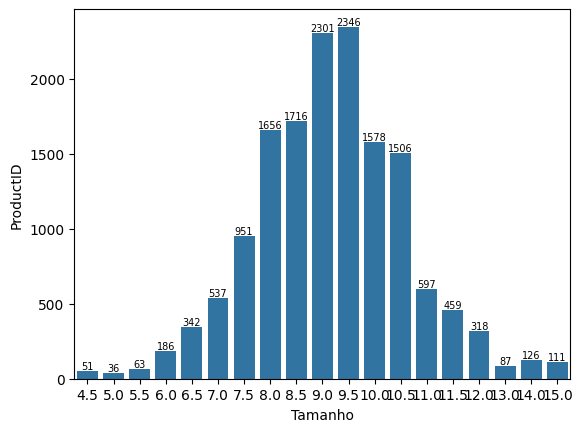

In [ ]:
ax = sns.barplot(data=freq['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

Para Fortaleza, temos abaixo:

[Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '18'),
 Text(0, 0, '36'),
 Text(0, 0, '48'),
 Text(0, 0, '99'),
 Text(0, 0, '213'),
 Text(0, 0, '216'),
 Text(0, 0, '276'),
 Text(0, 0, '282'),
 Text(0, 0, '177'),
 Text(0, 0, '168'),
 Text(0, 0, '72'),
 Text(0, 0, '42'),
 Text(0, 0, '30'),
 Text(0, 0, '3'),
 Text(0, 0, '15'),
 Text(0, 0, '12')]

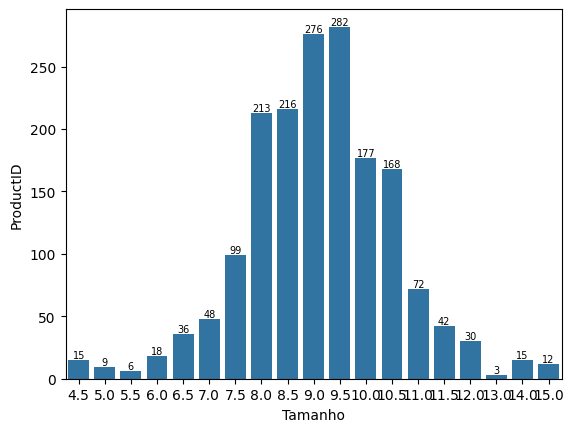

In [ ]:
ax = sns.barplot(data=freq_fort['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

Para Aracati, temos abaixo:

[Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '9'),
 Text(0, 0, '45'),
 Text(0, 0, '102'),
 Text(0, 0, '186'),
 Text(0, 0, '270'),
 Text(0, 0, '441'),
 Text(0, 0, '513'),
 Text(0, 0, '612'),
 Text(0, 0, '675'),
 Text(0, 0, '498'),
 Text(0, 0, '510'),
 Text(0, 0, '165'),
 Text(0, 0, '144'),
 Text(0, 0, '90'),
 Text(0, 0, '33'),
 Text(0, 0, '30'),
 Text(0, 0, '48')]

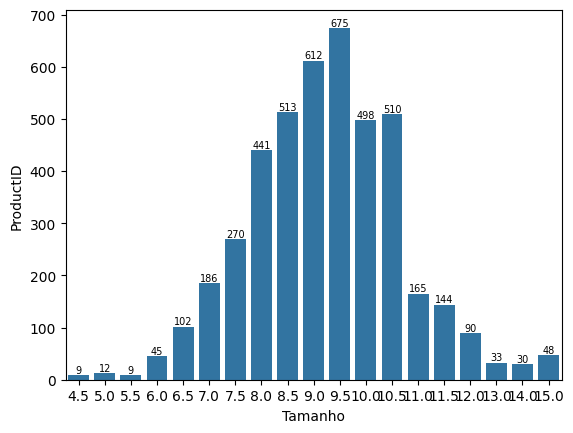

In [ ]:
ax = sns.barplot(data=freq_arac['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

Para Juazeiro, temos abaixo:

[Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '36'),
 Text(0, 0, '66'),
 Text(0, 0, '117'),
 Text(0, 0, '198'),
 Text(0, 0, '243'),
 Text(0, 0, '363'),
 Text(0, 0, '537'),
 Text(0, 0, '459'),
 Text(0, 0, '285'),
 Text(0, 0, '279'),
 Text(0, 0, '132'),
 Text(0, 0, '87'),
 Text(0, 0, '72'),
 Text(0, 0, '12'),
 Text(0, 0, '21'),
 Text(0, 0, '27')]

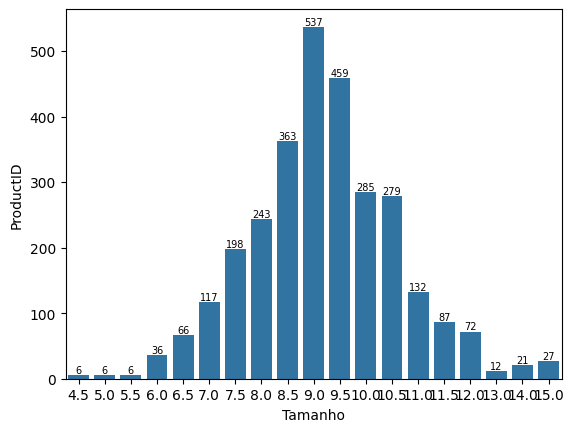

In [ ]:
ax = sns.barplot(data=freq_juaz['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

Para Sobral, temos abaixo:

[Text(0, 0, '21'),
 Text(0, 0, '9'),
 Text(0, 0, '42'),
 Text(0, 0, '87'),
 Text(0, 0, '138'),
 Text(0, 0, '186'),
 Text(0, 0, '384'),
 Text(0, 0, '759'),
 Text(0, 0, '624'),
 Text(0, 0, '876'),
 Text(0, 0, '930'),
 Text(0, 0, '618'),
 Text(0, 0, '549'),
 Text(0, 0, '228'),
 Text(0, 0, '186'),
 Text(0, 0, '126'),
 Text(0, 0, '39'),
 Text(0, 0, '60'),
 Text(0, 0, '24')]

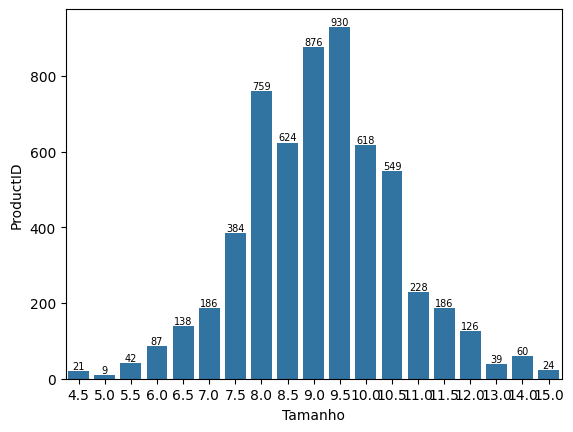

In [ ]:
ax = sns.barplot(data=freq_sobr['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

# Análise dos dados EDA

EDA para todas as Cidades

In [ ]:
freq["ProductID"].describe()

count      19.000000
mean      787.736842
std       799.636990
min        36.000000
25%       118.500000
50%       459.000000
75%      1542.000000
max      2346.000000
Name: ProductID, dtype: float64

EDA para Fortaleza:

In [ ]:
freq_fort["ProductID"].describe()

count     19.000000
mean      91.421053
std       97.403123
min        3.000000
25%       15.000000
50%       42.000000
75%      172.500000
max      282.000000
Name: ProductID, dtype: float64

EDA para Aracati:

In [ ]:
freq_arac["ProductID"].describe()

count     19.000000
mean     231.157895
std      231.091916
min        9.000000
25%       39.000000
50%      144.000000
75%      469.500000
max      675.000000
Name: ProductID, dtype: float64

EDA para Juazeiro:

In [ ]:
freq_juaz["ProductID"].describe()

count     19.000000
mean     155.368421
std      163.372516
min        6.000000
25%       24.000000
50%       87.000000
75%      261.000000
max      537.000000
Name: ProductID, dtype: float64

EDA para Sobral:

In [ ]:
freq_sobr["ProductID"].describe()

count     19.000000
mean     309.789474
std      314.178042
min        9.000000
25%       51.000000
50%      186.000000
75%      583.500000
max      930.000000
Name: ProductID, dtype: float64

# **Qual o intervalo de confiança que será usado?**

95%

# **Qual a estatística será usada? Z ou t?**

Utilizado sera a t

# **Com base na sua resposta a pergunta 7, qual a sua justificativa?**

Como , da forma que foi organizado, so possuimos 4 valores, para cada cidade o tamanho representa um valor ( valor de itens vendidos de tamanho para 4 cidades), temos que 4 é menor que 30 , logo, como é uma amostra muito pequena, o t sera usado, a fim de reduzir o tamanho do erro

In [ ]:
freq_fort_r = freq_fort["ProductID"]
freq_arac_r = freq_arac["ProductID"]
freq_juaz_r = freq_juaz["ProductID"]
freq_sobr_r = freq_sobr["ProductID"]

In [ ]:
aux1 = pd.concat([freq_fort_r, freq_arac_r], axis=1)

In [ ]:
aux2 = pd.concat([freq_juaz_r, freq_sobr_r], axis=1)

In [ ]:
freq_todas = pd.concat([aux1, aux2], axis=1)

In [ ]:
freq_todas

,ProductID,ProductID,ProductID,ProductID
Tamanho,,,,
4.5,15,9,6,21
5.0,9,12,6,9
5.5,6,9,6,42
6.0,18,45,36,87
6.5,36,102,66,138
7.0,48,186,117,186
7.5,99,270,198,384
8.0,213,441,243,759
8.5,216,513,363,624


In [ ]:
freq_todas_transposed = freq_todas.T

In [ ]:
freq_todas_transposed

Tamanho,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,13.0,14.0,15.0
ProductID,15,9,6,18,36,48,99,213,216,276,282,177,168,72,42,30,3,15,12
ProductID,9,12,9,45,102,186,270,441,513,612,675,498,510,165,144,90,33,30,48
ProductID,6,6,6,36,66,117,198,243,363,537,459,285,279,132,87,72,12,21,27
ProductID,21,9,42,87,138,186,384,759,624,876,930,618,549,228,186,126,39,60,24


In [ ]:
freq_todas_transposed.describe()

Tamanho,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,13.0,14.0,15.0
count,4.000000,4.00000,4.00000,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,12.750000,9.00000,15.75000,46.500000,85.50000,134.25000,237.750000,414.000000,429.000000,575.25000,586.500000,394.500000,376.500000,149.250000,114.750000,79.500000,21.750000,31.500000,27.750000
std,6.652067,2.44949,17.55705,29.240383,44.19276,66.06247,120.084345,251.260821,177.769514,246.85674,279.762399,199.967497,183.081949,65.101843,63.231717,39.912404,17.036725,19.974984,14.974979
min,6.000000,6.00000,6.00000,18.000000,36.00000,48.00000,99.000000,213.000000,216.000000,276.00000,282.000000,177.000000,168.000000,72.000000,42.000000,30.000000,3.000000,15.000000,12.000000
25%,8.250000,8.25000,6.00000,31.500000,58.50000,99.75000,173.250000,235.500000,326.250000,471.75000,414.750000,258.000000,251.250000,117.000000,75.750000,61.500000,9.750000,19.500000,21.000000
50%,12.000000,9.00000,7.50000,40.500000,84.00000,151.50000,234.000000,342.000000,438.000000,574.50000,567.000000,391.500000,394.500000,148.500000,115.500000,81.000000,22.500000,25.500000,25.500000
75%,16.500000,9.75000,17.25000,55.500000,111.00000,186.00000,298.500000,520.500000,540.750000,678.00000,738.750000,528.000000,519.750000,180.750000,154.500000,99.000000,34.500000,37.500000,32.250000
max,21.000000,12.00000,42.00000,87.000000,138.00000,186.00000,384.000000,759.000000,624.000000,876.00000,930.000000,618.000000,549.000000,228.000000,186.000000,126.000000,39.000000,60.000000,48.000000


# **Quantos pares de cada sapato devemos ter em estoque**

Cidade, porcentagem relativa de dados
1. Aracati      29.344558
2. Fortaleza    11.605532
3. Juazeiro     19.723391
4. Sobral       39.326518

In [ ]:
df_fortaleza = dfpio[dfpio["Cidade"] == "Fortaleza"]
df_Aracati = dfpio[dfpio["Cidade"] == "Aracati"]
df_Juazeiro = dfpio[dfpio["Cidade"] == "Juazeiro"]
df_Sobral = dfpio[dfpio["Cidade"] == "Sobral"]

abaixo , o numero de lojas de fortaleza:

In [ ]:
para_for = df_fortaleza["Loja"].nunique()
para_for

5

abaixo , o numero de lojas de aracati:

In [ ]:
para_ara = df_Aracati["Loja"].nunique()
para_ara

3

abaixo , o numero de lojas de juazeiro:

In [ ]:
para_jua = df_Juazeiro["Loja"].nunique()
para_jua

6

abaixo , o numero de lojas de sobral:

In [ ]:
para_sob = df_Sobral["Loja"].nunique()
para_sob

15

Agora, dividiremos a quantidade de pordutos de cada tamanho pela quantidade de loja na cidade, fortaleza = 5, aracati = 3, juazeiro = 6 e sonbral =15)
Como queremos um valor inteiro. o utilizamos as 2 barras // e add +1 para termos o inteiro seguinte

In [ ]:
freq_int_for = freq_fort['ProductID']//para_for + 1
freq_int_ara = freq_arac['ProductID']//para_ara + 1
freq_int_jua = freq_juaz['ProductID']//para_jua + 1
freq_int_sob = freq_sobr['ProductID']//para_sob + 1


Abaixo, a quantidade de itens no estoque para lojas alocadas em fortaleza:

In [ ]:
freq_int_for

Tamanho
4.5      4
5.0      2
5.5      2
6.0      4
6.5      8
7.0     10
7.5     20
8.0     43
8.5     44
9.0     56
9.5     57
10.0    36
10.5    34
11.0    15
11.5     9
12.0     7
13.0     1
14.0     4
15.0     3
Name: ProductID, dtype: int64

Abaixo, a quantidade de itens no estoque para lojas alocadas em Aracati:

In [ ]:
freq_int_ara

Tamanho
4.5       4
5.0       5
5.5       4
6.0      16
6.5      35
7.0      63
7.5      91
8.0     148
8.5     172
9.0     205
9.5     226
10.0    167
10.5    171
11.0     56
11.5     49
12.0     31
13.0     12
14.0     11
15.0     17
Name: ProductID, dtype: int64

Abaixo, a quantidade de itens no estoque para lojas alocadas em Juazeiro:

In [ ]:
freq_int_jua

Tamanho
4.5      2
5.0      2
5.5      2
6.0      7
6.5     12
7.0     20
7.5     34
8.0     41
8.5     61
9.0     90
9.5     77
10.0    48
10.5    47
11.0    23
11.5    15
12.0    13
13.0     3
14.0     4
15.0     5
Name: ProductID, dtype: int64

Abaixo, a quantidade de itens no estoque para lojas alocadas em Sobral:

In [ ]:
freq_int_sob

Tamanho
4.5      2
5.0      1
5.5      3
6.0      6
6.5     10
7.0     13
7.5     26
8.0     51
8.5     42
9.0     59
9.5     63
10.0    42
10.5    37
11.0    16
11.5    13
12.0     9
13.0     3
14.0     5
15.0     2
Name: ProductID, dtype: int64

In [ ]:
freq_todas_transposed.describe()

Tamanho,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,13.0,14.0,15.0
count,4.000000,4.00000,4.00000,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,12.750000,9.00000,15.75000,46.500000,85.50000,134.25000,237.750000,414.000000,429.000000,575.25000,586.500000,394.500000,376.500000,149.250000,114.750000,79.500000,21.750000,31.500000,27.750000
std,6.652067,2.44949,17.55705,29.240383,44.19276,66.06247,120.084345,251.260821,177.769514,246.85674,279.762399,199.967497,183.081949,65.101843,63.231717,39.912404,17.036725,19.974984,14.974979
min,6.000000,6.00000,6.00000,18.000000,36.00000,48.00000,99.000000,213.000000,216.000000,276.00000,282.000000,177.000000,168.000000,72.000000,42.000000,30.000000,3.000000,15.000000,12.000000
25%,8.250000,8.25000,6.00000,31.500000,58.50000,99.75000,173.250000,235.500000,326.250000,471.75000,414.750000,258.000000,251.250000,117.000000,75.750000,61.500000,9.750000,19.500000,21.000000
50%,12.000000,9.00000,7.50000,40.500000,84.00000,151.50000,234.000000,342.000000,438.000000,574.50000,567.000000,391.500000,394.500000,148.500000,115.500000,81.000000,22.500000,25.500000,25.500000
75%,16.500000,9.75000,17.25000,55.500000,111.00000,186.00000,298.500000,520.500000,540.750000,678.00000,738.750000,528.000000,519.750000,180.750000,154.500000,99.000000,34.500000,37.500000,32.250000
max,21.000000,12.00000,42.00000,87.000000,138.00000,186.00000,384.000000,759.000000,624.000000,876.00000,930.000000,618.000000,549.000000,228.000000,186.000000,126.000000,39.000000,60.000000,48.000000


In [ ]:
medias = freq_todas_transposed.mean()

Tamanho
4.5      12.75
5.0       9.00
5.5      15.75
6.0      46.50
6.5      85.50
7.0     134.25
7.5     237.75
8.0     414.00
8.5     429.00
9.0     575.25
9.5     586.50
10.0    394.50
10.5    376.50
11.0    149.25
11.5    114.75
12.0     79.50
13.0     21.75
14.0     31.50
15.0     27.75
dtype: float64

In [ ]:
desvio_padrao = np.std(freq_todas_transposed)

In [ ]:
grau_liberdade = 3

In [ ]:
intervalo_confianca = stats.t.interval(0.95, grau_liberdade, loc=medias, scale=desvio_padrao / np.sqrt(len(freq_todas_transposed)))

Abaixo intervalo de confiança para se ter no estoque cada tamanho de pé. em ordem de 4,5 até 12.

In [ ]:
intervalo_confianca

(array([  3.58318729,   5.62450596,  -8.44431126,   6.20559212,
         24.60062402,  43.21329483,  72.26900796,  67.75262079,
        184.02655743, 235.0716189 , 200.97631483, 118.93685527,
        124.205811  ,  59.53707714,  27.61418574,  24.49912371,
         -1.727283  ,   3.97367909,   7.11388465]),
 array([ 21.91681271,  12.37549404,  39.94431126,  86.79440788,
        146.39937598, 225.28670517, 403.23099204, 760.24737921,
        673.97344257, 915.4283811 , 972.02368517, 670.06314473,
        628.794189  , 238.96292286, 201.88581426, 134.50087629,
         45.227283  ,  59.02632091,  48.38611535]))

* 4.5   -   (3.58318729 , 21.91681271)
* 5.0    -  (5.62450596 , 12.37549404)
* 5.5     - (-8.44431126 , 39.94431126)
* 6.0    -  (6.20559212 , 86.79440788)
* 6.5    -  (24.60062402 , 146.39937598)
* 7.0    - (43.21329483 , 225.28670517)
* 7.5    - (72.26900796 , 403.23099204)
* 8.0    - (67.75262079 , 760.24737921)
* 8.5    - (184.02655743 , 673.97344257)
* 9.0    - (235.0716189 , 915.4283811)
* 9.5   - (200.97631483 , 972.02368517)
* 10.0   - (118.93685527 , 670.06314473)
* 10.5   -  (124.205811 , 628.794189)
* 11.0   - (59.53707714 , 238.96292286)
* 11.5   - (27.61418574 , 201.88581426)
* 12.0   -  (24.49912371 , 134.50087629)
* 13.0   -   (-1.727283 ,  45.227283 )
* 14.0   -   (3.97367909 , 59.02632091)
* 15.0   - (7.11388465 ,  48.38611535 )




# *** Parte 2***

In [ ]:
dfpio

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
3,52389,2014-01-01 01:06:24,Fortaleza,2152,FO2,Masc,11,44,10.5,159,0,2014.0,1,159
4,52390,2014-01-01 03:44:48,Sobral,2230,SO15,Masc,11.5,44-45,11,199,0.2,2014.0,1,159.2
5,52391,2014-01-01 09:01:36,Juazeiro,2160,JUA7,Masc,9.5,42-43,9,149,0.2,2014.0,1,119.2
6,52392,2014-01-01 09:16:00,Sobral,2234,SO6,Fem,9.5,40,7.5,159,0,2014.0,1,159
7,52393,2014-01-01 13:35:12,Fortaleza,2222,FO4,Fem,9,39-40,7,159,0,2014.0,1,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,65773,2016-12-31 13:35:12,Fortaleza,2154,FO2,Masc,9.5,42-43,9,139,0,2016.0,12,139
14966,65774,2016-12-31 14:32:48,Sobral,2181,SO12,Fem,12,42-43,10,149,0,2016.0,12,149
14967,65775,2016-12-31 15:59:12,Juazeiro,2203,JUA6,Masc,10.5,43-44,10,179,0.3,2016.0,12,125.3
14968,65776,2016-12-31 17:54:24,Aracati,2231,ARA1,Fem,9.5,40,7.5,199,0,2016.0,12,199


In [ ]:
df_ARA1 = dfpio[dfpio["Loja"] == "ARA1"]

In [ ]:
dfpio_ARA1 = df_ARA1[df_ARA1["Sexo"] =='Fem']

In [ ]:
dfpio_ARA1

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
18,52401,2014-01-03 02:32:48,Aracati,2197,ARA1,Fem,8.5,39,6.5,179,0.2,2014.0,1,143.2
52,52429,2014-01-07 09:59:12,Aracati,2239,ARA1,Fem,9.5,40,7.5,159,0.5,2014.0,1,79.5
183,52535,2014-01-25 13:20:48,Aracati,2197,ARA1,Fem,8.5,39,6.5,179,0.2,2014.0,1,143.2
195,52546,2014-01-26 21:59:12,Aracati,2227,ARA1,Fem,9,39-40,7,149,0.1,2014.0,1,134.1
217,52566,2014-01-31 13:49:36,Aracati,2165,ARA1,Fem,10.5,41,8.5,179,0.2,2014.0,1,143.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,65733,2016-12-28 19:20:48,Aracati,2242,ARA1,Fem,7,37-38,5,189,0.3,2016.0,12,132.3
14934,65742,2016-12-29 11:40:00,Aracati,2188,ARA1,Fem,9.5,40,7.5,189,0,2016.0,12,189
14960,65768,2016-12-31 04:42:24,Aracati,2205,ARA1,Fem,7.5,38,5.5,159,0,2016.0,12,159
14968,65776,2016-12-31 17:54:24,Aracati,2231,ARA1,Fem,9.5,40,7.5,199,0,2016.0,12,199


In [ ]:
df_ARA2 = dfpio[dfpio["Loja"] == "ARA2"]

In [ ]:
dfpio_ARA2 = df_ARA2[df_ARA2["Sexo"] =='Fem']

In [ ]:
dfpio_ARA2

,NF,Data,Cidade,ProductID,Loja,Sexo,Tamanho,Tam(EU),Tam(UK),Preco,Desconto,NaN,Month,P. Venda
9,52395,2014-01-02 01:06:24,Aracati,2200,ARA2,Fem,9,39-40,7,179,0,2014.0,1,179
36,52414,2014-01-05 02:32:48,Aracati,2239,ARA2,Fem,8.5,39,6.5,129,0.5,2014.0,1,64.5
50,52427,2014-01-07 09:44:48,Aracati,2242,ARA2,Fem,7,37-38,5,189,0.1,2014.0,1,170.1
57,52434,2014-01-08 09:59:12,Aracati,2238,ARA2,Fem,9.5,40,7.5,189,0,2014.0,1,189
108,52475,2014-01-16 17:11:12,Aracati,2242,ARA2,Fem,7,37-38,5,189,0.1,2014.0,1,170.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,65707,2016-12-26 17:25:36,Aracati,2166,ARA2,Fem,5.5,36,3.5,149,0.1,2016.0,12,134.1
14935,65743,2016-12-29 12:23:12,Aracati,2239,ARA2,Fem,8.5,39,6.5,129,0.5,2016.0,12,64.5
14940,65748,2016-12-29 19:20:48,Aracati,2208,ARA2,Fem,7,37-38,5,199,0,2016.0,12,199
14944,65752,2016-12-30 05:11:12,Aracati,2204,ARA2,Fem,8.5,39,6.5,179,0.3,2016.0,12,125.3


In [ ]:
freq_ARA1 = dfpio_ARA1.groupby(["Tamanho"]).count()
freq_ARA1['ProductID']

Tamanho
4.5       6
5.0       6
5.5       3
6.0       3
6.5      39
7.0      42
7.5      75
8.0     147
8.5     153
9.0     102
9.5      66
10.0     36
10.5     30
11.0      3
11.5      3
12.0      3
Name: ProductID, dtype: int64

In [ ]:
freq_ARA1['ProductID'].describe()

count     16.000000
mean      44.812500
std       50.905427
min        3.000000
25%        3.000000
50%       33.000000
75%       68.250000
max      153.000000
Name: ProductID, dtype: float64

In [ ]:
freq_ARA2 = dfpio_ARA2.groupby(["Tamanho"]).count()
freq_ARA2['ProductID']

Tamanho
4.5       3
5.0       3
5.5       6
6.0       9
6.5      36
7.0      90
7.5     111
8.0     159
8.5     132
9.0     117
9.5      48
10.0     30
10.5     24
11.0      6
11.5      9
12.0      6
Name: ProductID, dtype: int64

In [ ]:
freq_ARA2['ProductID'].describe()

count     16.000000
mean      49.312500
std       53.709985
min        3.000000
25%        6.000000
50%       27.000000
75%       95.250000
max      159.000000
Name: ProductID, dtype: float64

[Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '39'),
 Text(0, 0, '42'),
 Text(0, 0, '75'),
 Text(0, 0, '147'),
 Text(0, 0, '153'),
 Text(0, 0, '102'),
 Text(0, 0, '66'),
 Text(0, 0, '36'),
 Text(0, 0, '30'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

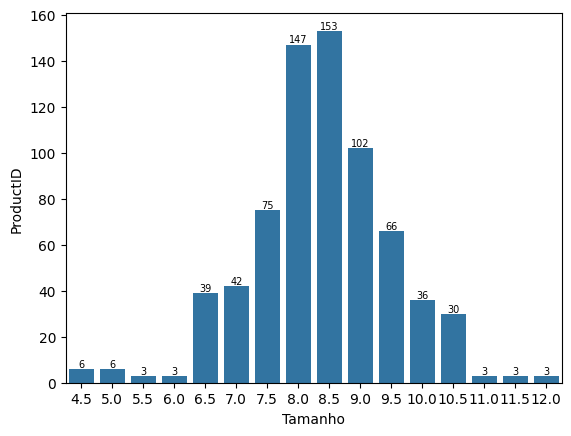

In [ ]:
ax = sns.barplot(data=freq_ARA1['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '36'),
 Text(0, 0, '90'),
 Text(0, 0, '111'),
 Text(0, 0, '159'),
 Text(0, 0, '132'),
 Text(0, 0, '117'),
 Text(0, 0, '48'),
 Text(0, 0, '30'),
 Text(0, 0, '24'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '6')]

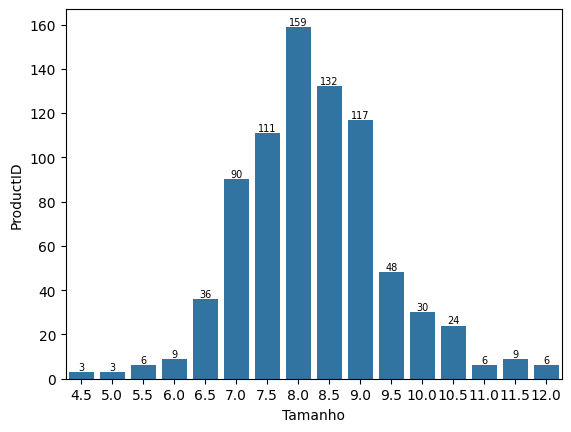

In [ ]:
ax = sns.barplot(data=freq_ARA2['ProductID'])
ax.bar_label(ax.containers[0], fontsize=7)

In [ ]:
import numpy as np

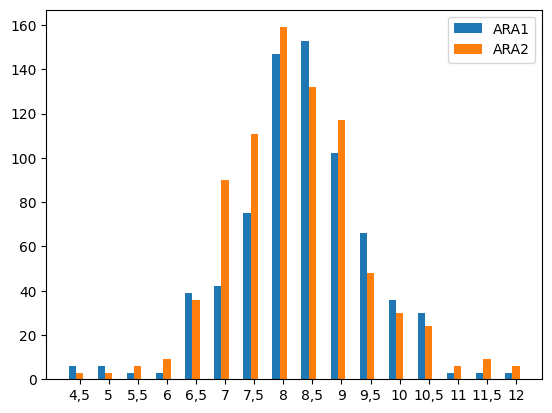

In [ ]:
dados_ara1= freq_ARA1['ProductID']
dados_ara2 = freq_ARA2['ProductID']

r1 = np.arange(len(dados_ara1))
largura = 0.25

r2 = [x + largura for x in r1]


plt.bar(r1,freq_ARA1['ProductID'], width=largura, label ="ARA1")
plt.bar(r2,freq_ARA2['ProductID'], width=largura,label ="ARA2")


plt.xticks([r +largura for r in range(len(dados_ara1))],['4,5','5','5,5','6','6,5','7','7,5','8','8,5','9','9,5','10','10,5','11','11,5','12'])

plt.legend()
plt.show()

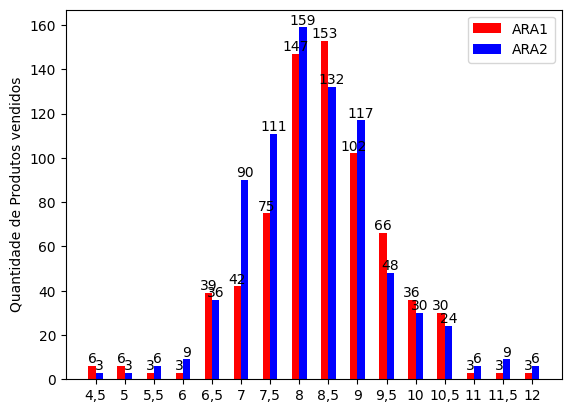

In [ ]:
N = 16
ARA1 = freq_ARA1['ProductID']

ind = np.arange(N)
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ARA1, width, color='r')

ARA2 = freq_ARA2['ProductID']
rects2 = ax.bar(ind + width, ARA2, width, color='b')

ax.set_ylabel('Quantidade de Produtos vendidos')
ax.set_title('')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('4,5','5','5,5','6','6,5','7','7,5','8','8,5','9','9,5','10','10,5','11','11,5','12'))
ax.legend((rects1[0], rects2[0]), ('ARA1', 'ARA2'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
freq_ARA1_r = freq_ARA1['ProductID']
freq_ARA2_r = freq_ARA2['ProductID']


In [ ]:
freq_ara1_ara2 = pd.concat([freq_ARA1_r, freq_ARA2_r], axis=1)

In [ ]:
freq_ara1_ara2

,ProductID,ProductID
Tamanho,,
4.5,6,3
5.0,6,3
5.5,3,6
6.0,3,9
6.5,39,36
7.0,42,90
7.5,75,111
8.0,147,159
8.5,153,132


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t, p = ttest_ind(freq_ARA1['ProductID'],freq_ARA2['ProductID'])

In [ ]:
t

-0.24324046704849617

In [ ]:
p

0.8094746792828988